# Applications of MLP

### Importing the libraries

In [401]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Churn Analysis
---
- Churn refers to the number of customers who stop doing business with a company within a given time period. <br><br>
- A high churn rate can be a sign of customer dissatisfaction or a problem with the company's products or services. It can also be caused by factors outside of the company's control, such as a competitor offering a better deal.<br><br>
- Churning customers can have a number of economic disadvantages for a business, including:<br>
    - Loss of revenue. When customers churn, they stop paying for the company's products or services. This can lead to a significant loss of revenue, especially for businesses that rely on recurring revenue.<br><br>
    - Increased marketing costs. To replace lost customers, businesses often need to spend more on marketing and sales. This can be a significant expense, especially for businesses with a high churn rate.<br><br>
    - Damage to brand reputation. When customers churn, they may spread negative word-of-mouth about the company. This can damage the company's brand reputation and make it more difficult to attract new customers.<br><br>
    - Increased customer acquisition costs. It is more expensive to acquire new customers than to retain existing customers. This is because new customers are less likely to be familiar with the company's products or services and may require more hand-holding.<br><br>
    - Decreased customer lifetime value. The customer lifetime value (CLV) is the total amount of money that a customer is expected to spend with a company over their lifetime. When customers churn, the company loses out on the potential future revenue that they could have generated from that customer.<br><br>

- The economic disadvantages of churning customers can be significant, so it is important for businesses to take steps to reduce churn. Some common ways to reduce churn include:<br><br>

    - Providing excellent customer service. This means being responsive to customer inquiries, resolving problems quickly and efficiently, and going the extra mile to make sure that customers are satisfied.<br><br>
    - Offering competitive prices. This means keeping prices in line with the competition and offering discounts and promotions to encourage customers to stay with the company.<br><br>
    - Constantly innovating. This means keeping up with the latest trends and offering new and improved products and services to keep customers engaged.<br><br>
    - Personalizing the customer experience. This means getting to know each customer's individual needs and preferences and tailoring the company's offerings accordingly.
<br><br>
- By taking steps to reduce churn, businesses can improve their bottom line and ensure long-term success.

## Part 1 - Data Preprocessing

### Importing the dataset

In [402]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [403]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [404]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [405]:
pd.DataFrame(X, columns = ["Gender","Age","Hypertension","HeartDisease","SmokingHistory","BMI","HbA1cLevel","BloodGlucoseLevel"])

,Gender,Age,Hypertension,HeartDisease,SmokingHistory,BMI,HbA1cLevel,BloodGlucoseLevel
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [406]:
pd.DataFrame(y, columns = ["Diabetes"])

,Diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [407]:
X

array([['Female', 80.0, 0, ..., 25.19, 6.6, 140],
       ['Female', 54.0, 0, ..., 27.32, 6.6, 80],
       ['Male', 28.0, 0, ..., 27.32, 5.7, 158],
       ...,
       ['Male', 66.0, 0, ..., 27.83, 5.7, 155],
       ['Female', 24.0, 0, ..., 35.42, 4.0, 100],
       ['Female', 57.0, 0, ..., 22.43, 6.6, 90]], dtype=object)

In [408]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Encoding categorical data

Label Encoding the "Gender" column

In [409]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [410]:
print(X)

[[0 80.0 0 ... 25.19 6.6 140]
 [0 54.0 0 ... 27.32 6.6 80]
 [1 28.0 0 ... 27.32 5.7 158]
 ...
 [1 66.0 0 ... 27.83 5.7 155]
 [0 24.0 0 ... 35.42 4.0 100]
 [0 57.0 0 ... 22.43 6.6 90]]


One Hot Encoding the "SmokingHistory" column

In [411]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [412]:
print(X)

[[0.0 0.0 0.0 ... 25.19 6.6 140]
 [1.0 0.0 0.0 ... 27.32 6.6 80]
 [0.0 0.0 0.0 ... 27.32 5.7 158]
 ...
 [0.0 0.0 0.0 ... 27.83 5.7 155]
 [0.0 0.0 0.0 ... 35.42 4.0 100]
 [0.0 1.0 0.0 ... 22.43 6.6 90]]


### Splitting the dataset into the Training set and Test set

In [413]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

### Feature Scaling

In [414]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [415]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [416]:
ann.add(tf.keras.layers.Dense(units=8, activation='sigmoid'))

### Adding the second hidden layer


In [417]:
ann.add(tf.keras.layers.Dense(units=4, activation='tanh'))
ann.add(tf.keras.layers.Dense(units=2, activation='tanh'))

### Adding the output layer

In [418]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [419]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [420]:
ann.fit(X_train, y_train, batch_size = 1000, epochs = 50)

Epoch 1/50
50/50 [==============================] - 7s 7ms/step - loss: 0.7469 - accuracy: 0.3333
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5392 - accuracy: 0.9173
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4178 - accuracy: 0.9147
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3537 - accuracy: 0.9147
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: 0.3186 - accuracy: 0.9147
Epoch 6/50
50/50 [==============================] - 1s 11ms/step - loss: 0.2965 - accuracy: 0.9147
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.2794 - accuracy: 0.9147
Epoch 8/50
50/50 [==============================] - 0s 5ms/step - loss: 0.2636 - accuracy: 0.9147
Epoch 9/50
50/50 [==============================] - 0s 10ms/step - loss: 0.2475 - accuracy: 0.9147
Epoch 10/50
50/50 [==============================] - 0s 5ms/step - loss: 0.2319 - accuracy: 0.9147
Epoch 11/50
50/50

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [421]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

1563/1563 [==============================] - 9s 6ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [422]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))


[[45335   429]
 [ 1566  2670]]
0.9601
0.7280163599182004
0.861568247821878
0.6303116147308782


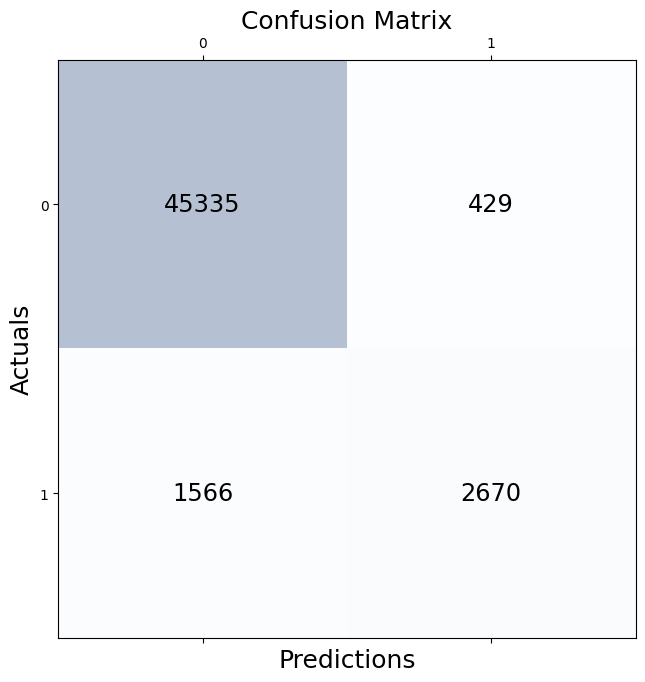

In [423]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Homework**
- Use the dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset.
- Experiment with the number of hidden layers, and the number of units in the hidden layer.
- Try to experiment on the activation functions in the hidden layer https://www.tensorflow.org/api_docs/python/tf/keras/activations
- Try to experiment with the optimizer: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- Check the accuracy, specificity, and sensitivity of your model.